In [23]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
from scipy import signal


In [16]:
with open('data_20F.pickle', 'rb') as fh:
    data = pickle.load(fh)

In [17]:
radar_cube_list = np.array(data['radar_cube_list'])
mags_breathing = np.array(data['mags_breathing'])
phases_breathing = np.array(data['phases_breathing'])
maximumpeak = data['max_bin']
subtracted_range_profile_average = np.array(data['bkg_subtracted'])
subtracted_range_profile_average.shape

(150, 1, 256)

In [18]:
radar_cube_list.shape

(150, 3, 4, 256)

In [19]:
maximumpeak

15

In [69]:
fft_mag = np.abs(np.fft.fft(mags_breathing[10:]))
fft_pha = np.abs(np.fft.fft(phases_breathing[10:]))
print(len(fft_mag))

140


In [68]:
def max_peak(peaks,range_data_mag):
    temp = []

    for i in range(len(peaks[0])):
        temp.append(range_data_mag[peaks[0][i]])
    temp = sorted(temp, reverse=True)
    max_result = np.where(range_data_mag == temp[0])[0][0]
    max_peak_second = np.where(range_data_mag == temp[1])[0][0]


    return max_result, max_peak_second

# Find peaks in fft_mag
peaks_fft_mag = find_peaks(fft_mag)
breath, heart = max_peak(peaks_fft_mag, fft_mag)

xf = np.fft.rfftfreq(n_frames, 1 / 5)

print(xf[breath], xf[heart])


IndexError: list index out of range

Text(0.5, 0, 'Pha FFT')

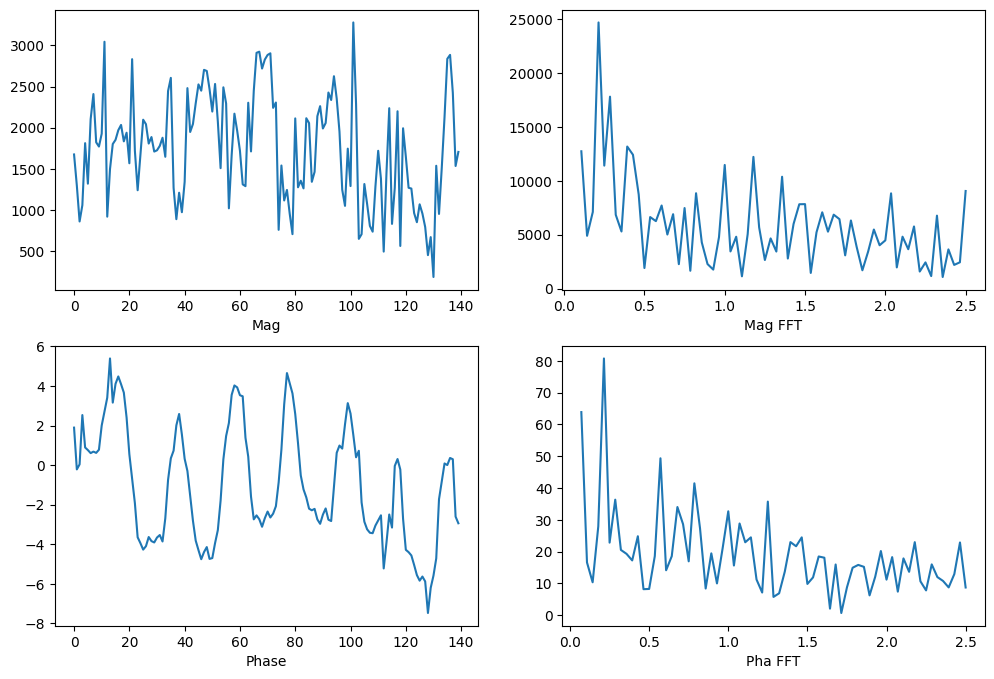

In [30]:
n_frames = 140
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(mags_breathing[10:]) ## this 10 is because we are finding fft after 10 frames because in first 10 frames subtracted profile is being calculated
plt.xlabel('Mag')
plt.subplot(2,2,3)
plt.plot(np.unwrap(phases_breathing[10:]))
plt.xlabel('Phase')
plt.subplot(2,2,2)
plt.plot(xf[3:], fft_mag[3:int(n_frames/2 + 1)]) ##
plt.xlabel('Mag FFT')
plt.subplot(2,2,4)
plt.plot(xf[2:], fft_pha[2:int(n_frames/2 + 1)])
plt.xlabel('Pha FFT')


68
68


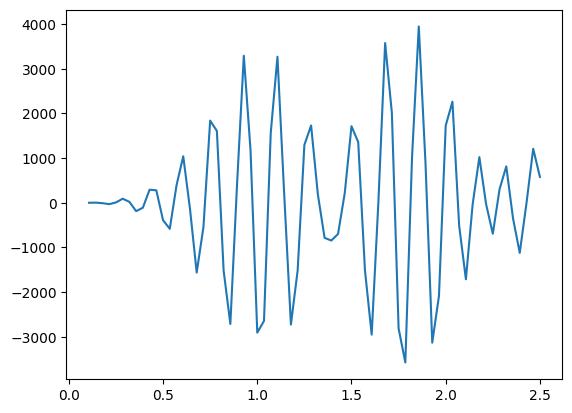

None


In [66]:
# unfiltered = mags_breathing[10:]
unfiltered = fft_mag[3:int(n_frames/2 + 1)]
lowcut = 0.9
highcut = 1.2
fs = 5
from scipy.signal import butter, lfilter

def butter_bandpass_filter(unfiltered, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq

    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, unfiltered)
    print(len(y))
#     x = np.arange(0,len(y)*0.01,0.01)
#     plt.plot(x,(y))
    print(len(xf[3:]))
    plt.plot(xf[3:],y)
    plt.draw()
    plt.show()
#     return y


print(butter_bandpass_filter(unfiltered, lowcut, highcut, fs, order=5))